In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,label_binarize
label_encoder = LabelEncoder()
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [41]:
dataset = ['Iris','Titanic','Penguins','Mushroom', 'Email Spam']
accuracies_gnb,accuracies_dtc  = [], []

Decision Tree Classifier Accuracy : 1.0
Gaussian Naive bayes Accuarcy :0.8888888888888888


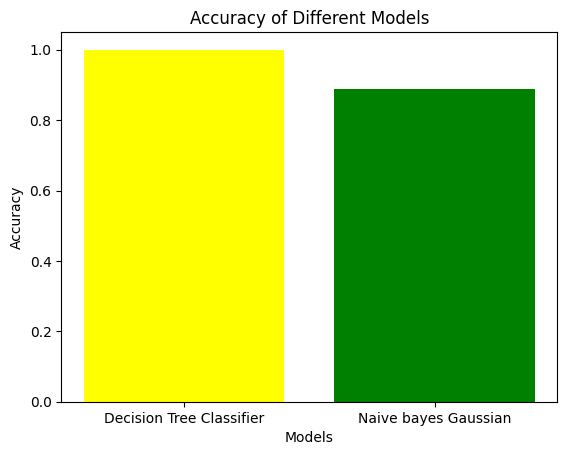


Confusion Matrix for Decision Tree Classifier:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Confusion Matrix for Naive bayes Gaussian :
[[19  0  0]
 [ 1 11  1]
 [ 0  0 13]]


ROC AUC


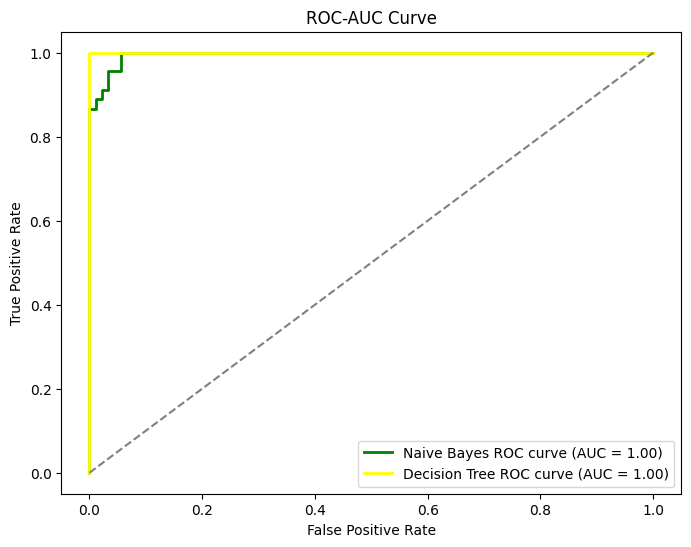

In [42]:
d1 = sns.load_dataset('iris')
d1.dropna(inplace=True)
Y = d1['species']
Y = label_binarize(Y, classes=['setosa', 'versicolor', 'virginica'])
d1.drop('species',axis=1,inplace=True)
X = d1
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
dtc = OneVsRestClassifier(DecisionTreeClassifier())
gnb = OneVsRestClassifier(GaussianNB())
dtc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_gnb = accuracy_score(Y_test, y_pred1)
accuracies_dtc.append(accuracy)
accuracies_gnb.append(accuracy_gnb)


models = ['Decision Tree Classifier', 'Naive bayes Gaussian']
accuracies = [accuracy, accuracy_gnb]
print(f"Decision Tree Classifier Accuracy : {accuracy}\nGaussian Naive bayes Accuarcy :{accuracy_gnb}")
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

cm_dtc = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)
print()
cm_gnb = confusion_matrix(Y_test.argmax(axis=1), y_pred1.argmax(axis=1))
print("\nConfusion Matrix for Naive bayes Gaussian :")
print(cm_gnb)
print()


print("\nROC AUC")
y_score_gnb = gnb.predict_proba(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test.ravel(), y_score_gnb.ravel())
roc_auc_gnb = roc_auc_score(Y_test, y_score_gnb)

y_score_dtc = dtc.predict_proba(X_test)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test.ravel(), y_score_dtc.ravel())
roc_auc_dtc = roc_auc_score(Y_test, y_score_dtc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Naive Bayes ROC curve (AUC = {:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='Decision Tree ROC curve (AUC = {:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classifier : 1.0 
Gaussian Naive bayes : 0.9301538461538461 


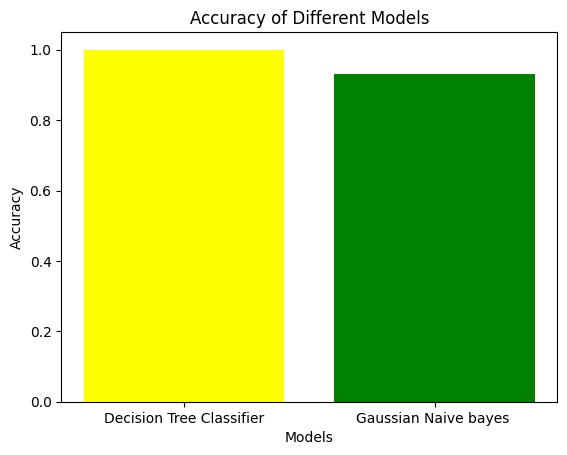


Confusion Matrix for Decision Tree Classifier:
[[1678    0]
 [   0 1572]]


Confusion Matrix Gaussian Naive bayes :
[[1562  116]
 [ 111 1461]]


AUROC


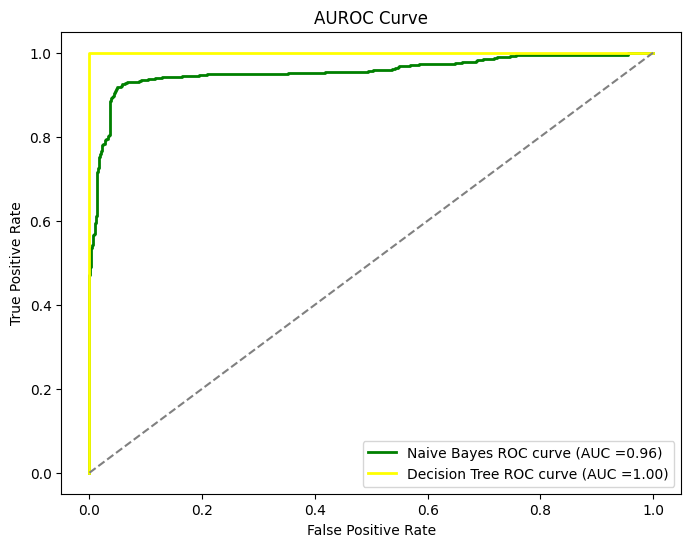

In [43]:
d4 =pd.read_csv("https://raw.githubusercontent.com/PrerakPatel13/Sem_5_Practs/main/dataset/mushrooms.csv")
d4.head(4)
Y = d4["class"]
Y = Y.map({'p':1,'e':0})
col = d4.columns
for i in col:
  d4[i] = label_encoder.fit_transform(d4[i])
d4 = d4.iloc[:,1:]
X_train,X_test,Y_train,Y_test = train_test_split(d4,Y,test_size = 0.4,random_state=42)
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
dtc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_gnb = accuracy_score(Y_test, y_pred1)
accuracies_dtc.append(accuracy)
accuracies_gnb.append(accuracy_gnb)
print(f"Decision Tree Classifier : {accuracy} \nGaussian Naive bayes : {accuracy_gnb} ")
models = ['Decision Tree Classifier', 'Gaussian Naive bayes ']
accuracies = [accuracy, accuracy_gnb]
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
cm_dtc = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)
print()
cm_gnb = confusion_matrix(Y_test, y_pred1)
print("\nConfusion Matrix Gaussian Naive bayes :")
print(cm_gnb)
print()
print("\nAUROC")
y_score_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, y_score_gnb)
roc_auc_gnb = roc_auc_score(Y_test, y_score_gnb)
y_score_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test, y_score_dtc)
roc_auc_dtc = roc_auc_score(Y_test, y_score_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Naive Bayes ROC curve (AUC ={:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='Decision Tree ROC curve (AUC ={:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree Classifier : 1.0 
Gaussian Naive bayes : 0.9301538461538461 


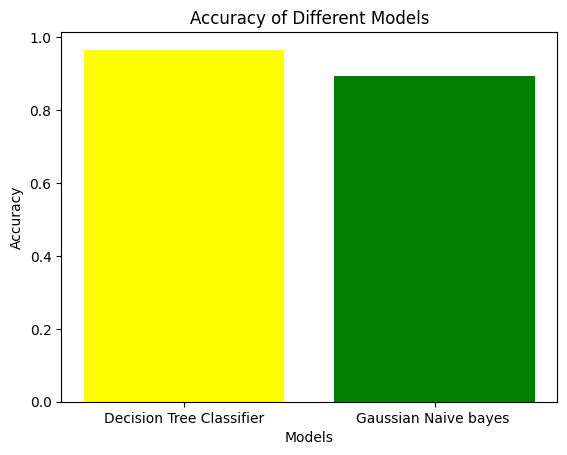


Confusion Matrix for Naive Bayes:
[[1295  156]
 [  22  199]]

Confusion Matrix for Decision Tree Classifier:
[[1426   25]
 [  32  189]]

 AUROC


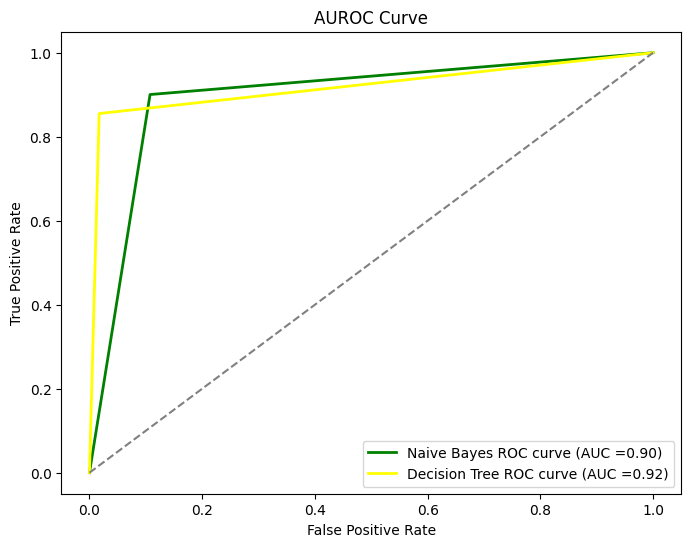

In [45]:
d5 = pd.read_csv("https://raw.githubusercontent.com/PrerakPatel13/Sem_5_Practs/main/dataset/spam.csv")
d5.head(2)
d5.isna().sum()
d5['spam']=d5['Category'].apply(lambda x: 1 if x=='spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(d5.Message,d5.spam,test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]
from sklearn.naive_bayes import MultinomialNB
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
dtc.fit(X_train_count,y_train)
gnb.fit(X_train_count.toarray(),y_train)
X_test_count = v.transform(X_test)
acc1=gnb.score(X_test_count.toarray(), y_test)
acc2=dtc.score(X_test_count, y_test)
accuracies_dtc.append(acc2)
accuracies_gnb.append(acc1)
print(f"Decision Tree Classifier : {accuracy} \nGaussian Naive bayes : {accuracy_gnb} ")
models = ['Decision Tree Classifier', 'Gaussian Naive bayes ']
accuracies = [acc2,acc1]
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
y_pred_mnb = gnb.predict(X_test_count.toarray())
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nConfusion Matrix for Naive Bayes:")
print(cm_mnb)
y_pred_dtc = dtc.predict(X_test_count)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)
print("\n AUROC")
y_prob_gnb = gnb.predict_proba(X_test_count.toarray())[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_prob_gnb)
y_prob_dtc = dtc.predict_proba(X_test_count)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_prob_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_prob_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Naive Bayes ROC curve (AUC ={:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='Decision Tree ROC curve (AUC ={:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend(loc='lower right')
plt.show()


Decision Tree Classifier : 0.98 
Gaussian Naive bayes : 0.81 


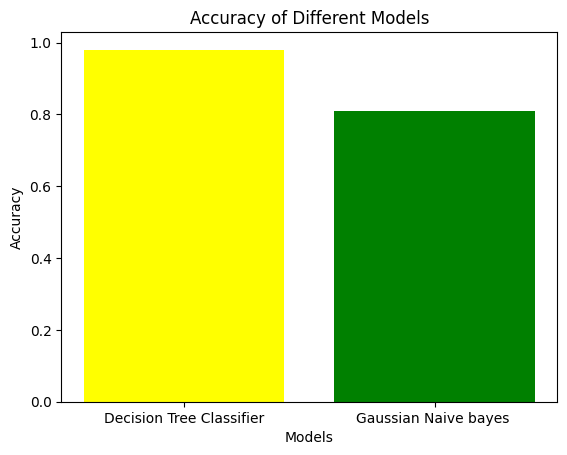


Confusion Matrix for Decision Tree Classifier:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]


Confusion Matrix Gaussian Naive bayes :
[[46  2  0]
 [ 1 17  0]
 [ 0  0 34]]


AUROC


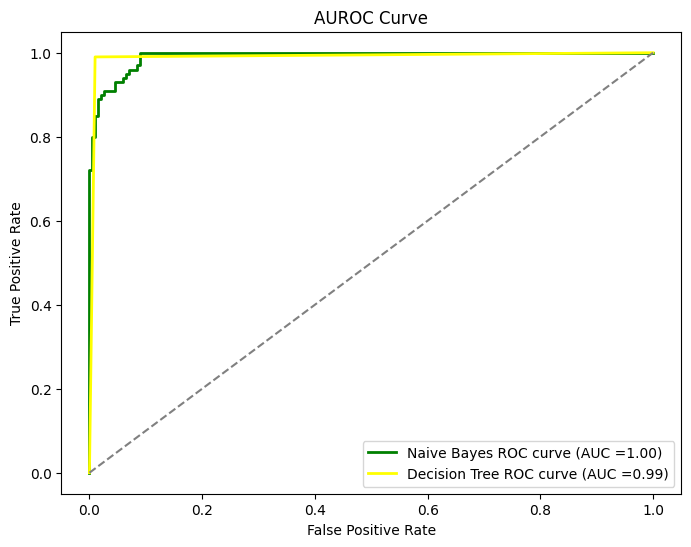

In [46]:
d3 = sns.load_dataset('penguins')
d3.dropna(inplace=True)
island = pd.get_dummies(data=d3["island"],drop_first=True)
sex = pd.get_dummies(data=d3["sex"],drop_first=True)
d3 = pd.concat([d3,island,sex],axis =1)
d3.drop(['sex','island'],axis=1,inplace=True)
Y = d3["species"]
Y = label_binarize(Y, classes=['Adelie' ,'Chinstrap' ,'Gentoo'])
d3.drop("species",axis=1,inplace=True)
X = d3
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
dtc = OneVsRestClassifier(DecisionTreeClassifier())
gnb = OneVsRestClassifier(GaussianNB())
dtc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_gnb = accuracy_score(Y_test, y_pred1)
accuracies_dtc.append(accuracy)
accuracies_gnb.append(accuracy_gnb)
models = ['Decision Tree Classifier', 'Gaussian Naive bayes ']
accuracies = [accuracy, accuracy_gnb]
print(f"Decision Tree Classifier : {accuracy} \nGaussian Naive bayes : {accuracy_gnb} ")
plt.bar(models, accuracies, color=[ 'yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
cm_dtc = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)
print()
cm_gnb = confusion_matrix(Y_test.argmax(axis=1), y_pred1.argmax(axis=1))
print("\nConfusion Matrix Gaussian Naive bayes :")
print(cm_gnb)
print()
print("\nAUROC")
y_score_gnb = gnb.predict_proba(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test.ravel(), y_score_gnb.ravel())
roc_auc_gnb = roc_auc_score(Y_test, y_score_gnb)
y_score_dtc = dtc.predict_proba(X_test)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test.ravel(), y_score_dtc.ravel())
roc_auc_dtc = roc_auc_score(Y_test, y_score_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Naive Bayes ROC curve (AUC ={:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='Decision Tree ROC curve (AUC ={:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Classifier Accuracy : 0.732
Gaussian Naive bayes Accuarcy :0.766


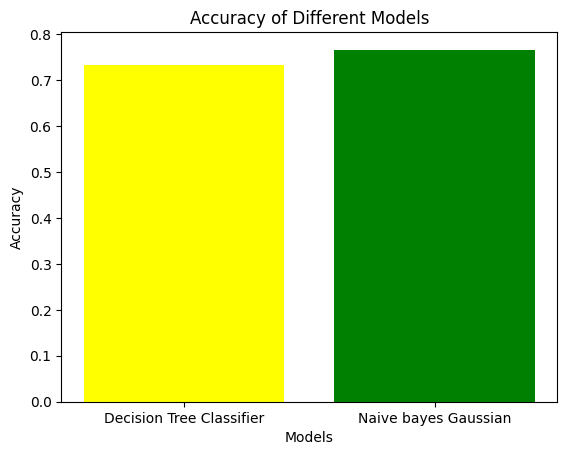


Confusion Matrix for Decision Tree Classifier:
[[226  68]
 [ 66 140]]


Confusion Matrix Gaussian Naive bayes :
[[234  60]
 [ 57 149]]


ROC AUC


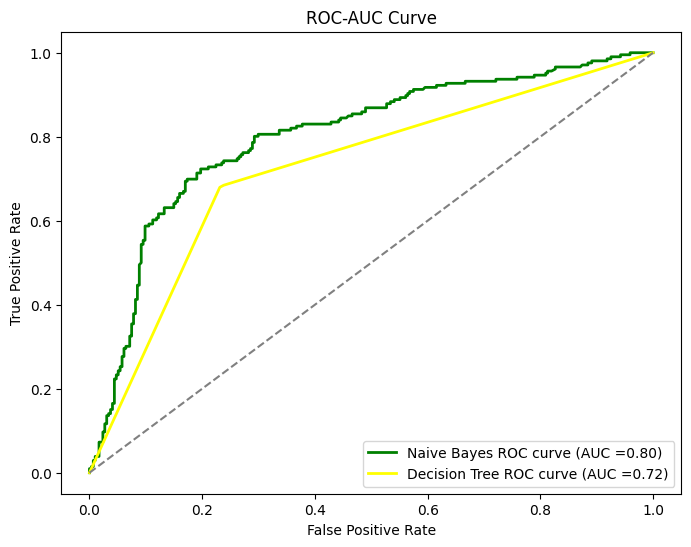

In [47]:
d2 = pd.read_csv("https://raw.githubusercontent.com/PrerakPatel13/Sem_5_Practs/main/dataset/titanic.csv")
d2.head(2)
sex=pd.get_dummies(d2['Sex'],drop_first=True)
emb=pd.get_dummies(d2['Embarked'],drop_first=True)
pclass=pd.get_dummies(d2['Pclass'],drop_first=True)
d2 = pd.concat([d2,sex,emb,pclass],axis =1)
d2.drop(["PassengerId","Name","Pclass","Sex","Embarked","Ticket","Cabin"],axis=1,inplace=
True)
d2.dropna(inplace=True)
d2.head(5)
y = d2["Survived"]
x = d2.drop(["Survived"],axis=1)
x.dropna(inplace=True)
x.columns = x.columns.astype(str)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.7,random_state=0)
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
dtc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_gnb = accuracy_score(Y_test, y_pred1)
accuracies_dtc.append(accuracy)
accuracies_gnb.append(accuracy_gnb)
models = ['Decision Tree Classifier', 'Naive bayes Gaussian']
accuracies = [accuracy, accuracy_gnb]
print(f"Decision Tree Classifier Accuracy : {accuracy}\nGaussian Naive bayes Accuarcy :{accuracy_gnb}")
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
cm_dtc = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix for Decision Tree Classifier:")
print(cm_dtc)
print()
cm_gnb = confusion_matrix(Y_test, y_pred1)
print("\nConfusion Matrix Gaussian Naive bayes :")
print(cm_gnb)
print()
print("\nROC AUC")
y_score_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, y_score_gnb)
roc_auc_gnb = roc_auc_score(Y_test, y_score_gnb)
y_score_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test, y_score_dtc)
roc_auc_dtc = roc_auc_score(Y_test, y_score_dtc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label='Naive Bayes ROC curve (AUC ={:.2f})'.format(roc_auc_gnb))
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='Decision Tree ROC curve (AUC ={:.2f})'.format(roc_auc_dtc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

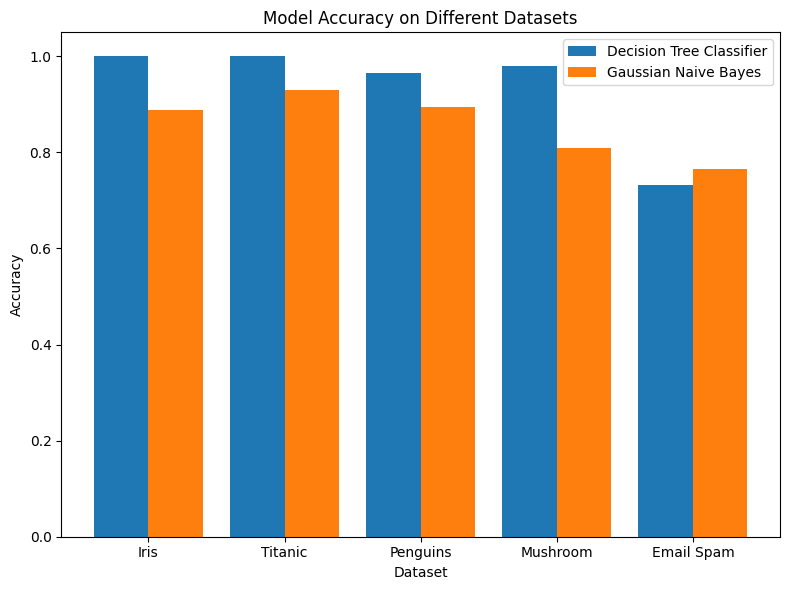

In [48]:
plt.figure(figsize=(8,6))

X_axis = np.arange(len(dataset))

plt.bar(X_axis - 0.2, accuracies_dtc, 0.4, label = 'Decision Tree Classifier')
plt.bar(X_axis + 0.2, accuracies_gnb, 0.4, label = 'Gaussian Naive Bayes')

plt.xticks(X_axis, dataset)
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Model Accuracy on Different Datasets")
plt.tight_layout()
plt.legend()
plt.show()


[0.79032258 0.78688525 0.73770492 0.85245902 0.78688525 0.81967213
 0.7704918 ]


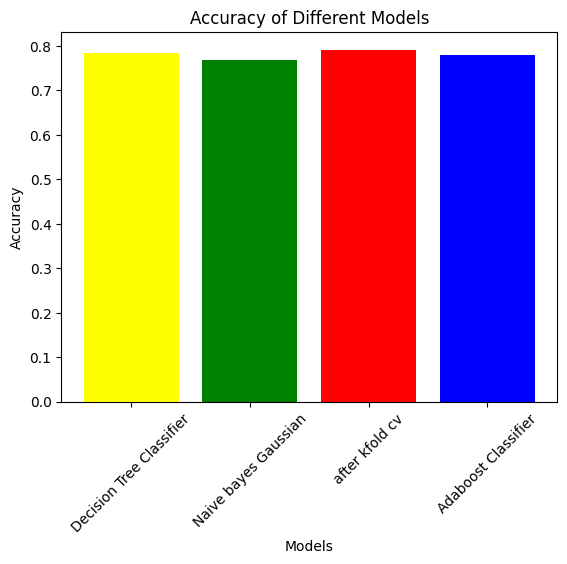


Decision Tree : 0.7832167832167832
 Gaussian Naive Bayes : 0.7692307692307693
After kfold cv Accuracy: 0.792060134471557 
Adaboost Classifier Accuracy: 0.7797202797202797 



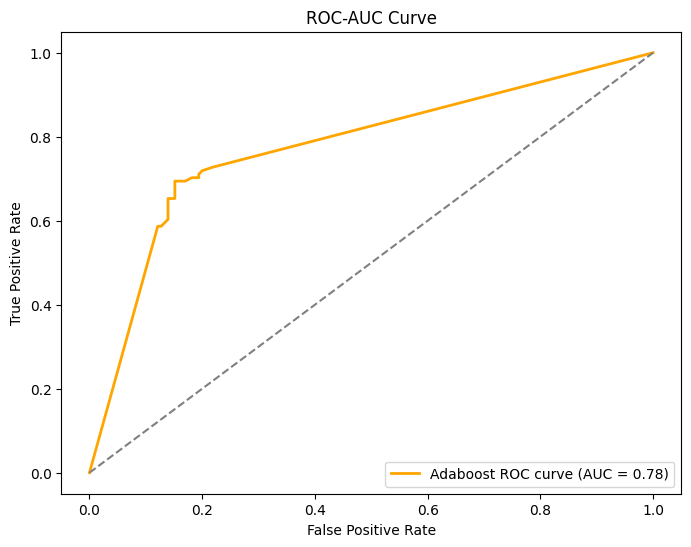

In [51]:
d6 = pd.read_csv("https://raw.githubusercontent.com/PrerakPatel13/Sem_5_Practs/main/dataset/titanic.csv")
d6.head(2)
sex=pd.get_dummies(d6['Sex'],drop_first=True)
emb=pd.get_dummies(d6['Embarked'],drop_first=True)
pclass=pd.get_dummies(d6['Pclass'],drop_first=True)
d6 = pd.concat([d6,sex,emb,pclass],axis =1)
d6.drop(["PassengerId","Name","Pclass","Sex","Embarked","Ticket","Cabin"],axis=1,inplace=
True)
d6.dropna(inplace=True)
d6.head(5)
y = d6["Survived"]
x = d6.drop(["Survived"],axis=1)
x.dropna(inplace=True)
x.columns = x.columns.astype(str)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=42)
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
dtc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
y_pred = dtc.predict(X_test)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
accuracy_gnb = accuracy_score(Y_test, y_pred1)
models = ['Decision Tree Classifier', 'Naive bayes Gaussian']
accuracies = [accuracy, accuracy_gnb]
kf = KFold(n_splits=7, shuffle=True, random_state=42)
cv_scores_abc = cross_val_score(dtc, X_train, Y_train, cv=kf)
print()
print(cv_scores_abc)
mean_accuracy_abc = np.mean(cv_scores_abc)
models.append('after kfold cv')
accuracies.append(mean_accuracy_abc)
# Fit the Adaboost model
abc = AdaBoostClassifier(estimator= dtc, n_estimators= 400, learning_rate = 1)
abc.fit(X_train, Y_train)
y_pred_abc = abc.predict(X_test)
accuracy_abc = accuracy_score(Y_test, y_pred_abc)
models.append('Adaboost Classifier')
accuracies.append(accuracy_abc)
# Plot updated accuracies
plt.bar(models, accuracies, color=['yellow', 'green', 'red','blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()
print(f"\nDecision Tree : {accuracy}\n Gaussian Naive Bayes : {accuracy_gnb}\nAfter kfold cv Accuracy: {mean_accuracy_abc} \nAdaboost Classifier Accuracy: {accuracy_abc} \n" )
y_score_abc = abc.predict_proba(X_test)[:, 1]
fpr_abc, tpr_abc, thresholds_abc = roc_curve(Y_test, y_score_abc)
roc_auc_abc = roc_auc_score(Y_test, y_score_abc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_abc, tpr_abc, color='orange', lw=2, label='Adaboost ROC curve (AUC = {:.2f})'.format(roc_auc_abc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()